# Exercise: Perceptron Implementation

## Stufe 1: Aufgabe 1-1

Task:

Run the code and ensure it works.
Debug the code using a debugger, paying attention to the dimensions of the data.
Test the implementation using Frochte's dataset on cars (replace the dataset in the code).

## Stufe 1: Aufgabe 1-2

Task:

Create a class for a perceptron model.
Initialize parameters in __init__.
Ensure fit and predict methods use only data inputs.
Use Frochte's data for training and the four test elements from the book for testing.
Do not scale data inside the class; ensure scaling is done externally using MinMaxScaler.

## Stufe 2: Aufgabe 2-1

Task:
Print and compare the slope of the decision boundary with a plot.
Visualize the decision boundary.

## Stufe 3a

Task:
Build a perceptron for 5-component input data.
Train it to output 1 if any component is 1 (extended OR gate).
Identify weights, starting with 10 training samples.
Test with multiple random seeds.



1. Data Loading and Debugging

In [2]:
# Load required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Autoklassifizierung.csv"
df = pd.read_csv(file_path, header=None, names=["Class", "Price", "Horsepower"])

# Debugging: Preview dataset
print("Dataset preview:")
print(df.head())


Dataset preview:
   Class  Price  Horsepower
0      0  26490          77
1      0  22490         114
2      0  24990         114
3      0  33500         110
4      0  35500         110


In [3]:
# Separate features (X) and target (y)
X = df[["Price", "Horsepower"]].values
y = df["Class"].values

# Debugging: Check dimensions
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (40, 2)
y shape: (40,)


2. Debugging Dimensions

In [4]:
# Debugging: Verify individual rows
print(f"First feature row: {X[0]}")
print(f"First target value: {y[0]}")


First feature row: [26490    77]
First target value: 0


3. Define Perceptron Class

In [5]:
# Define the Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)


4. Data Scaling and Class Testing

In [6]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.01, max_iter=1000)
perceptron.fit(X_train, y_train)

# Evaluate on the test set
y_pred = perceptron.predict(X_test)
print(f"Test Predictions: {y_pred}")
print(f"Actual Labels: {y_test}")


Test Predictions: [0 0 0 1 0 0 1 1]
Actual Labels: [0 0 0 1 0 0 1 1]


5. Decision Boundary Slope and Visualization

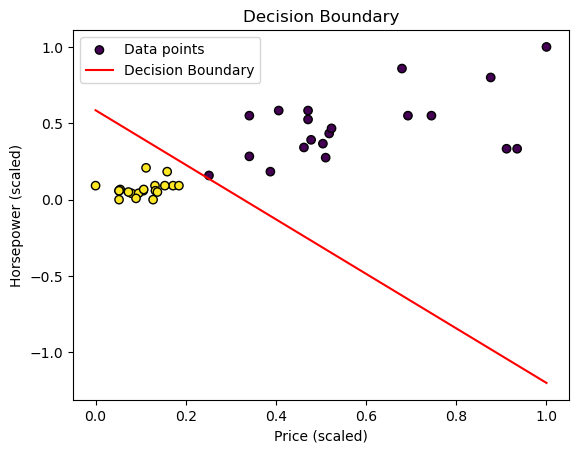

In [7]:
# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(model.weights[0] * x1 + model.bias) / model.weights[1]
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', label='Data points')
    plt.plot(x1, x2, color='red', label='Decision Boundary')
    plt.xlabel("Price (scaled)")
    plt.ylabel("Horsepower (scaled)")
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_scaled, y, perceptron)


In [8]:
# Print decision boundary slope
slope = -perceptron.weights[0] / perceptron.weights[1]
print(f"Decision boundary slope: {slope}")


Decision boundary slope: -1.785358233691682


6. Train Perceptron for 5-Component Data (Extended OR Gate)

In [9]:
# Generate extended OR dataset
np.random.seed(42)
X_or = np.random.randint(0, 2, size=(10, 5))
y_or = (np.any(X_or == 1, axis=1)).astype(int)

# Initialize and train perceptron
perceptron_or = Perceptron(learning_rate=0.1, max_iter=1000)
perceptron_or.fit(X_or, y_or)

# Display weights
print(f"Weights: {perceptron_or.weights}")
print(f"Bias: {perceptron_or.bias}")


Weights: [0. 0. 0. 0. 0.]
Bias: 0.0


In [10]:
# Test with new random data
X_test_or = np.random.randint(0, 2, size=(5, 5))
y_test_or = (np.any(X_test_or == 1, axis=1)).astype(int)

y_pred_or = perceptron_or.predict(X_test_or)
print(f"Test Inputs:\n{X_test_or}")
print(f"Predictions: {y_pred_or}")
print(f"Actual Labels: {y_test_or}")


Test Inputs:
[[0 1 0 1 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [1 1 0 1 1]
 [1 1 0 1 0]]
Predictions: [1 1 1 1 1]
Actual Labels: [1 1 0 1 1]
